## Final Project

<b>The Myers Briggs Type Indicator (MBTI) - finding common behaviour for personality type

I found dataset on kaggle: https://www.kaggle.com/datasnaek/mbti-type

This data was collected through the PersonalityCafe forum, as it provides a large selection of people and their MBTI personality type, as well as what they have written. 

This dataset contains over 8600 rows of data, on each row is a person’s:
1. Type (This persons 4 letter MBTI code/type)
2. A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In this project, I am going to split dataset to training set(85%) and test set(15%), and then from training set find most common word for every personality type and prepare for word similarity calculation using TF-IDF.

<b>I will create word vector on training set using TF-IDF. These vectors will be used on formula of cosine similarity.

<b>TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection.

In [75]:
import pandas as pd
import re
import math 
import warnings
import numpy as np
from random import randint
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mbti_1.csv', delimiter=',')

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df_train = df.head(int(df.shape[0]*85/100)).copy()

In [5]:
df_train.shape

(7373, 2)

In [6]:
df_test = df.tail(int(df.shape[0]*15/100)).copy()

In [7]:
df_test.shape

(1301, 2)

In [8]:
df_test.head()

,type,posts
7374,INFP,'i have tried. on multiple occasions. although...
7375,ISTP,'https://www.youtube.com/watch?v=IVMVEWhAU3g||...
7376,ESFP,'I think she is a INFJ..What do you guys think...
7377,INTP,'Thanks for the responses! You guys are awesom...
7378,INFP,'Are INFPs emotionally expressive? So I'm an ...


In [9]:
df_train.to_csv("mbti_train.csv", index=None, sep=',', header=True)
df_test.to_csv("mbti_test.csv", index=None, sep=',', header=True)

In [10]:
df = df_train

In [11]:
df_word = pd.read_csv('commonwords.csv', delimiter='|')

In [12]:
df_word.head()

,vocid,word
0,787,actress
1,787,actresses
2,789,actual
3,789,actualer
4,867,address


<b>column vocid is one words unique id, and will be used on word vector creation, word column is one words different variation

In [13]:
df.shape

(7373, 2)

In [14]:
df_word['wordid'] = df_word.index

In [15]:
df_voc = df_word.copy()

In [16]:
df_word.head()

,vocid,word,wordid
0,787,actress,0
1,787,actresses,1
2,789,actual,2
3,789,actualer,3
4,867,address,4


In [17]:
del df_word['vocid']

In [18]:
df_word.head()

,word,wordid
0,actress,0
1,actresses,1
2,actual,2
3,actualer,3
4,address,4


<b>Cleaning dataset, only leaving common words

In [19]:
df_word = df_word.set_index('word')
dic = df_word.to_dict('index')

In [20]:
df['posts'] = df['posts'].str.lower()
df = df.replace('\'','', regex=True)

In [21]:
def tokendic(posts):
    result=[]
    pattern = r"\w+(?:\.?\w+)*"
    posts_doc = re.findall(pattern, posts, re.A)
    for token in posts_doc:
        if token in dic:
            result.append(str(dic[token]['wordid']))
    return '|'.join(result)

In [22]:
df['wordid'] = df['posts'].apply(lambda x: tokendic(x))

In [23]:
df.head()

,type,posts,wordid
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...,9826|12|262|9826|5951|9260|364|6578|9826|9913|...
1,ENTP,im finding the lack of me in these posts very ...,3699|365|5019|6055|5465|4611|9088|6692|9676|79...
2,INTP,good one _____ https://www.youtube.com/watc...,4123|6105|9826|6055|2374|9215|9939|7677|4993|2...
3,INTJ,"dear intp, i enjoyed our conversation the ot...",2548|3199|6202|2284|365|6192|2534|395|365|5807...
4,ENTJ,youre fired.|||thats another silly misconcepti...,768|9054|852|9215|1159|365|4943|9215|9921|4833...


In [24]:
df_word = df_word.reset_index()

In [25]:
df_word['wordid'] = df_word['wordid'].astype('str')

In [26]:
df_word.dtypes

word      object
wordid    object
dtype: object

In [27]:
df_word.head()

,word,wordid
0,actress,0
1,actresses,1
2,actual,2
3,actualer,3
4,address,4


In [28]:
df_word = df_word.set_index('wordid')
dic2 = df_word.to_dict('index')

In [29]:
dic2['999']['word']

'attaching'

In [30]:
def tokendic2(tokenized):
    result=[]
    clean_doc = str(tokenized).split('|')
    for token in clean_doc:
        if token in dic2:
            result.append(dic2[token]['word'])            
    return ' '.join(result)

In [31]:
df['cleaned'] = df['wordid'].apply(lambda x: tokendic2(x))

In [32]:
df.head()

,type,posts,wordid,cleaned
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...,9826|12|262|9826|5951|9260|364|6578|9826|9913|...,watch and moments watch not top ten plays watc...
1,ENTP,im finding the lack of me in these posts very ...,3699|365|5019|6055|5465|4611|9088|6692|9676|79...,finding the lack of me in these posts very sex...
2,INTP,good one _____ https://www.youtube.com/watc...,4123|6105|9826|6055|2374|9215|9939|7677|4993|2...,good one watch of course to which say know my ...
3,INTJ,"dear intp, i enjoyed our conversation the ot...",2548|3199|6202|2284|365|6192|2534|395|365|5807...,dear enjoyed our conversation the other day ab...
4,ENTJ,youre fired.|||thats another silly misconcepti...,768|9054|852|9215|1159|365|4943|9215|9921|4833...,another that approaching to be the key to what...


In [33]:
df_word.shape

(10222, 1)

In [34]:
df['docid'] = df.index

In [35]:
df.head()

,type,posts,wordid,cleaned,docid
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...,9826|12|262|9826|5951|9260|364|6578|9826|9913|...,watch and moments watch not top ten plays watc...,0
1,ENTP,im finding the lack of me in these posts very ...,3699|365|5019|6055|5465|4611|9088|6692|9676|79...,finding the lack of me in these posts very sex...,1
2,INTP,good one _____ https://www.youtube.com/watc...,4123|6105|9826|6055|2374|9215|9939|7677|4993|2...,good one watch of course to which say know my ...,2
3,INTJ,"dear intp, i enjoyed our conversation the ot...",2548|3199|6202|2284|365|6192|2534|395|365|5807...,dear enjoyed our conversation the other day ab...,3
4,ENTJ,youre fired.|||thats another silly misconcepti...,768|9054|852|9215|1159|365|4943|9215|9921|4833...,another that approaching to be the key to what...,4


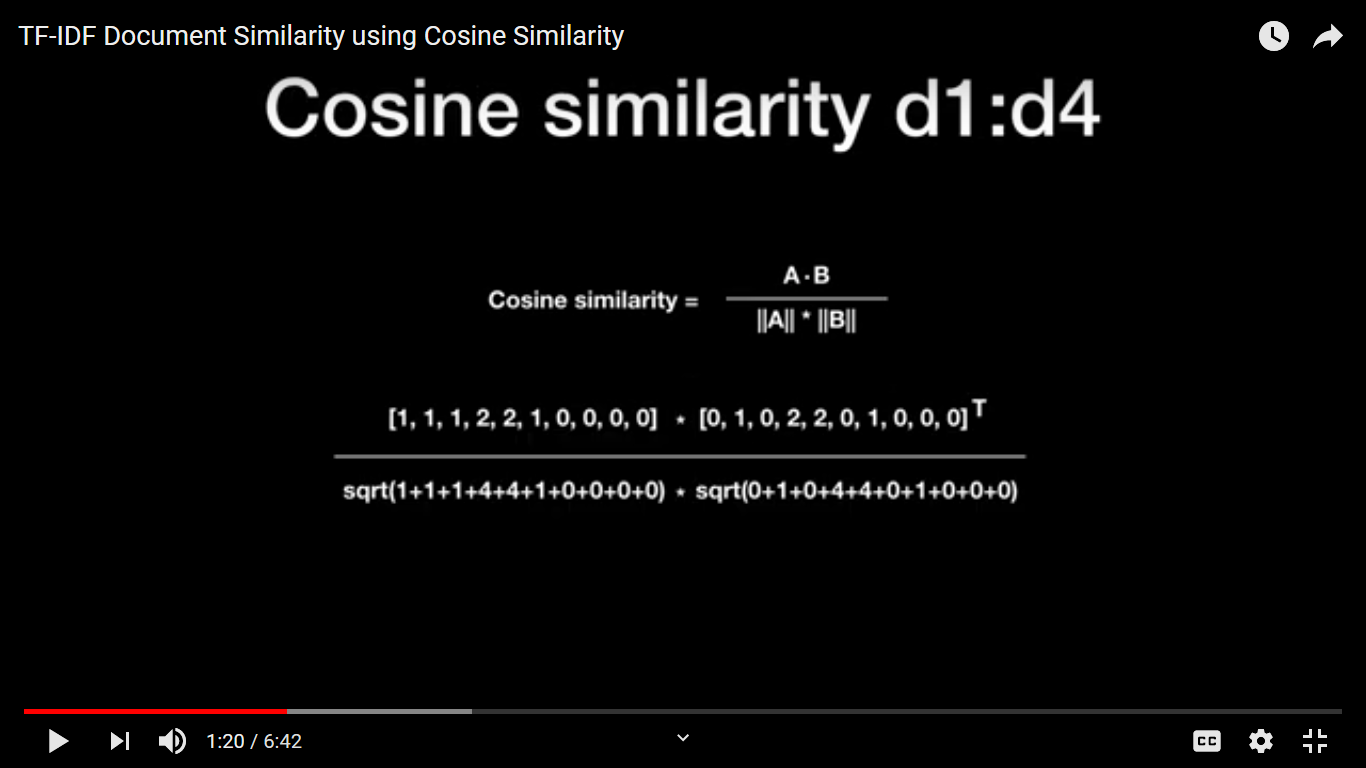

In [36]:
arr_voc = df_voc['vocid'].unique()

In [37]:
arr_voc

array([  787,   789,   867, ..., 81507, 81766,     4])

In [38]:
arr_voc = sorted(arr_voc)

In [39]:
df_tf = pd.DataFrame(arr_voc,columns=['vocid'])

In [40]:
df_tf.head()

,vocid
0,4
1,30
2,130
3,164
4,215


In [41]:
#all word vector for document from train dataset
for i,r in df.iterrows():
    docid=r[4]
    df_tf['d'+str(docid)] = float(0)

In [42]:
df_tf['dt'] = float(0) #vector for document from test dataset

In [43]:
df_tf.head()

,vocid,d0,d1,d2,d3,d4,d5,d6,d7,d8,...,d7364,d7365,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_tf.shape[0]

2907

<b>TF = vocid count in doc / total vocid in doc , 
IDF = Log( total doc count /vocid count in total docs)

In [45]:
df_idf = df_tf.copy()

In [46]:
df_idf['idf'] = float(0) #inverse document frequency
df_idf['df'] = float(0) #document frequency for current rows term (vocid)

In [47]:
df_idf.head()

,vocid,d0,d1,d2,d3,d4,d5,d6,d7,d8,...,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt,idf,df
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_voc2 = df_voc.copy()
del df_voc2['wordid']
df_voc2 = df_voc2.set_index('word')
dic2 = df_voc2.to_dict('index')

In [49]:
df_voc2.head()

,vocid
word,
actress,787
actresses,787
actual,789
actualer,789
address,867


In [50]:
def tokenvoc(cleaned):
    result=[]
    pattern = r"\w+(?:\.?\w+)*"
    posts_doc = re.findall(pattern, cleaned, re.A)
    for token in posts_doc:
        if token in dic2:
            result.append(str(dic2[token]['vocid']))
    return '|'.join(result)

In [51]:
df['vocid'] = df['cleaned'].apply(lambda x: tokenvoc(x))

In [52]:
df['doclen'] = 0

In [53]:
df.head()

,type,posts,wordid,cleaned,docid,vocid,doclen
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...,9826|12|262|9826|5951|9260|364|6578|9826|9913|...,watch and moments watch not top ten plays watc...,0,79782|3259|46077|79782|48596|73398|71821|55209...,0
1,ENTP,im finding the lack of me in these posts very ...,3699|365|5019|6055|5465|4611|9088|6692|9676|79...,finding the lack of me in these posts very sex...,1,27294|72288|40629|49464|44285|36482|72526|5631...,0
2,INTP,good one _____ https://www.youtube.com/watc...,4123|6105|9826|6055|2374|9215|9939|7677|4993|2...,good one watch of course to which say know my ...,2,30776|49749|79782|49464|16801|73164|80260|6361...,0
3,INTJ,"dear intp, i enjoyed our conversation the ot...",2548|3199|6202|2284|365|6192|2534|395|365|5807...,dear enjoyed our conversation the other day ab...,3,18400|24110|50576|16084|72288|50519|18336|220|...,0
4,ENTJ,youre fired.|||thats another silly misconcepti...,768|9054|852|9215|1159|365|4943|9215|9921|4833...,another that approaching to be the key to what...,4,3646|72275|4446|73164|7195|72288|39999|73164|8...,0


In [54]:
df_tf = df_tf.set_index('vocid')

In [55]:
for i,r in df.iterrows():
    v_vocid=r[5]
    docid = 'd'+str(i)
    if i % 100 == 0:
        print('docid: %s' % (docid))
    doc_vocid = str(v_vocid).split('|')
    for vocid in doc_vocid:
        count = df_tf.get_value(int(vocid), docid) + 1
        df_tf.set_value(int(vocid), docid, count)
        
        

docid: d0
docid: d100
docid: d200
docid: d300
docid: d400
docid: d500
docid: d600
docid: d700
docid: d800
docid: d900
docid: d1000
docid: d1100
docid: d1200
docid: d1300
docid: d1400
docid: d1500
docid: d1600
docid: d1700
docid: d1800
docid: d1900
docid: d2000
docid: d2100
docid: d2200
docid: d2300
docid: d2400
docid: d2500
docid: d2600
docid: d2700
docid: d2800
docid: d2900
docid: d3000
docid: d3100
docid: d3200
docid: d3300
docid: d3400
docid: d3500
docid: d3600
docid: d3700
docid: d3800
docid: d3900
docid: d4000
docid: d4100
docid: d4200
docid: d4300
docid: d4400
docid: d4500
docid: d4600
docid: d4700
docid: d4800
docid: d4900
docid: d5000
docid: d5100
docid: d5200
docid: d5300
docid: d5400
docid: d5500
docid: d5600
docid: d5700
docid: d5800
docid: d5900
docid: d6000
docid: d6100
docid: d6200
docid: d6300
docid: d6400
docid: d6500
docid: d6600
docid: d6700
docid: d6800
docid: d6900
docid: d7000
docid: d7100
docid: d7200
docid: d7300


In [56]:
df_tf.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d7364,d7365,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt
vocid,,,,,,,,,,,,,,,,,,,,,
4,17.0,24.0,8.0,23.0,22.0,37.0,39.0,26.0,27.0,26.0,...,24.0,28.0,36.0,26.0,23.0,23.0,37.0,43.0,6.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_idf = df_idf.set_index('vocid')

In [58]:
row = 0
for i,r in df_tf.iterrows():
    vocid=str(i)    
    total=0
    if row % 100 == 0:
        print(row)
    for i in range(0, 7373):
        docid = 'd'+str(i)
        if df_tf.get_value(int(vocid), docid) > 0:
            total = total + 1
            
    df_idf.set_value(int(vocid), 'df', float(total))
    row = row + 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [59]:
df_idf.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt,idf,df
vocid,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7366.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1102.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2410.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0


In [60]:
math.log(100, 10)

2.0

In [61]:
row = 0
for i,r in df_idf.iterrows():
    vocid=str(i)
    if row % 100 == 0:
        print(row)    
    total_df = df_idf.get_value(int(vocid), 'df')
    idf = math.log( 7373 / int(total_df), 10)
    df_idf.set_value(int(vocid), 'idf', float(idf))
    row = row + 1


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [62]:
df_idf.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt,idf,df
vocid,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000413,7366.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.876418,98.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.825463,1102.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.485627,2410.0
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.992583,75.0


In [63]:
for i,r in df.iterrows():
    v_vocid=r[5]
    docid = 'd'+str(i)
    if i % 100 == 0:
        print('docid: %s' % (docid))
    doc_vocid = str(v_vocid).split('|')
    total = len(doc_vocid)
    df.loc[i, ['doclen']] = total
    

docid: d0
docid: d100
docid: d200
docid: d300
docid: d400
docid: d500
docid: d600
docid: d700
docid: d800
docid: d900
docid: d1000
docid: d1100
docid: d1200
docid: d1300
docid: d1400
docid: d1500
docid: d1600
docid: d1700
docid: d1800
docid: d1900
docid: d2000
docid: d2100
docid: d2200
docid: d2300
docid: d2400
docid: d2500
docid: d2600
docid: d2700
docid: d2800
docid: d2900
docid: d3000
docid: d3100
docid: d3200
docid: d3300
docid: d3400
docid: d3500
docid: d3600
docid: d3700
docid: d3800
docid: d3900
docid: d4000
docid: d4100
docid: d4200
docid: d4300
docid: d4400
docid: d4500
docid: d4600
docid: d4700
docid: d4800
docid: d4900
docid: d5000
docid: d5100
docid: d5200
docid: d5300
docid: d5400
docid: d5500
docid: d5600
docid: d5700
docid: d5800
docid: d5900
docid: d6000
docid: d6100
docid: d6200
docid: d6300
docid: d6400
docid: d6500
docid: d6600
docid: d6700
docid: d6800
docid: d6900
docid: d7000
docid: d7100
docid: d7200
docid: d7300


In [64]:
df.head()

,type,posts,wordid,cleaned,docid,vocid,doclen
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw|||h...,9826|12|262|9826|5951|9260|364|6578|9826|9913|...,watch and moments watch not top ten plays watc...,0,79782|3259|46077|79782|48596|73398|71821|55209...,483
1,ENTP,im finding the lack of me in these posts very ...,3699|365|5019|6055|5465|4611|9088|6692|9676|79...,finding the lack of me in these posts very sex...,1,27294|72288|40629|49464|44285|36482|72526|5631...,871
2,INTP,good one _____ https://www.youtube.com/watc...,4123|6105|9826|6055|2374|9215|9939|7677|4993|2...,good one watch of course to which say know my ...,2,30776|49749|79782|49464|16801|73164|80260|6361...,666
3,INTJ,"dear intp, i enjoyed our conversation the ot...",2548|3199|6202|2284|365|6192|2534|395|365|5807...,dear enjoyed our conversation the other day ab...,3,18400|24110|50576|16084|72288|50519|18336|220|...,813
4,ENTJ,youre fired.|||thats another silly misconcepti...,768|9054|852|9215|1159|365|4943|9215|9921|4833...,another that approaching to be the key to what...,4,3646|72275|4446|73164|7195|72288|39999|73164|8...,724


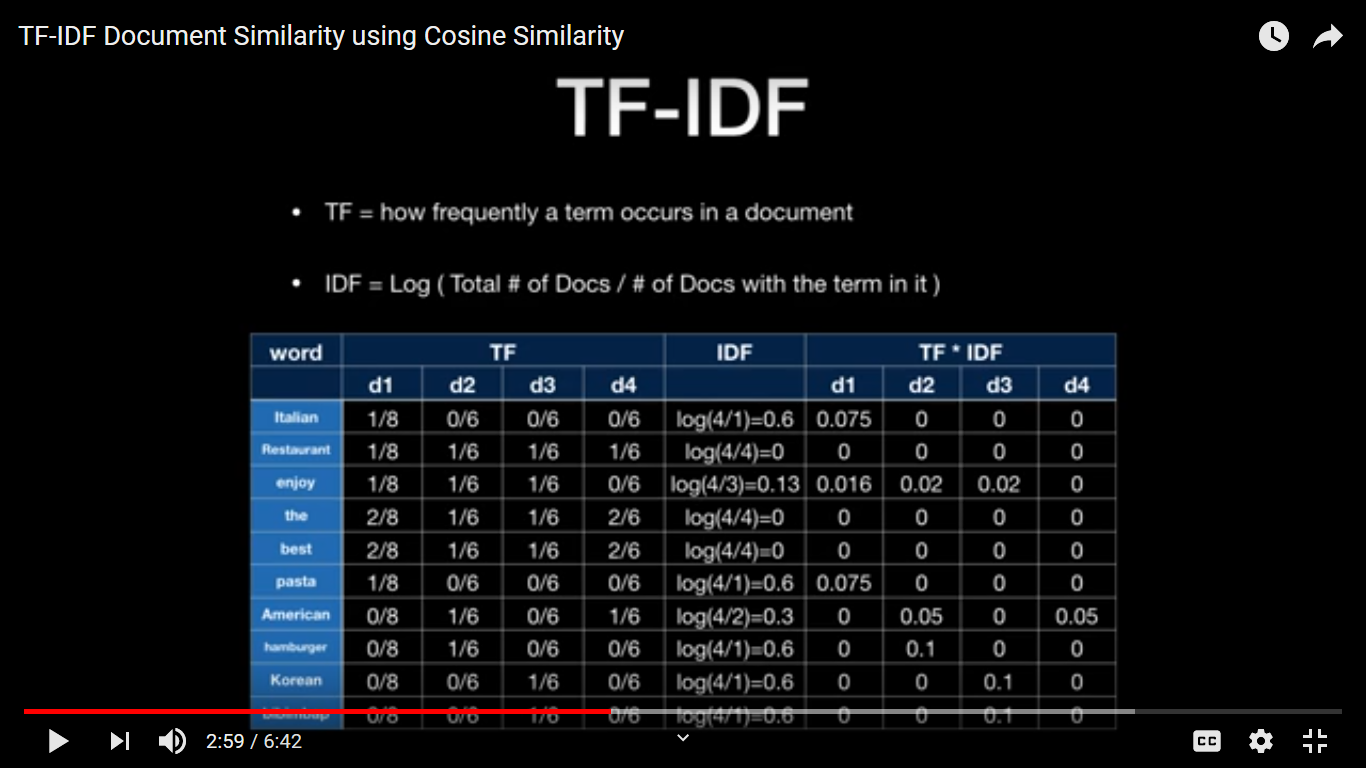

In [65]:
row = 0
for i,r in df_tf.iterrows():
    vocid=str(i)    
    total=0
    if row % 100 == 0:
        print(row)
    for j in range(0, 7373):
        docid = 'd'+str(j)
        tf = df_tf.get_value(int(vocid), docid)
        total = df.get_value(j, 'doclen')
        idf = df_idf.get_value(int(vocid), 'idf')
        tfidf = (float(tf) / float(total)) * float(idf)
        df_idf.set_value(i, docid, tfidf)
    row = row + 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [66]:
df_idf.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d7366,d7367,d7368,d7369,d7370,d7371,d7372,dt,idf,df
vocid,,,,,,,,,,,,,,,,,,,,,
4,0.000015,0.000011,0.000005,0.000012,0.000013,0.000013,0.000016,0.000011,0.000018,0.000011,...,0.000015,0.000015,0.000017,0.000009,0.000012,0.000014,0.000005,0.0,0.000413,7366.0
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.876418,98.0
130,0.000000,0.000000,0.002479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000660,0.000000,0.000000,0.0,0.825463,1102.0
164,0.000000,0.000558,0.000729,0.001195,0.000000,0.000418,0.000469,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000455,0.000000,0.000000,0.000000,0.0,0.485627,2410.0
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.992583,75.0


In [67]:
d0 = df_idf['d2'].values

In [68]:
d0

array([4.95518780e-06, 0.00000000e+00, 2.47886678e-03, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [87]:
# squared cosine distance similarity
def cosine_similarity(d1, d4):
    similarity = sum(d1 * d4) / (np.sqrt(sum(np.square(d1))) * np.sqrt(sum(np.square(d4))))
    return similarity

In [70]:
def test_vector_dt(posts):
    df_tf['dt'] = float(0)
    df_idf['dt'] = float(0)
    vocids = tokenvoc(posts)
    doclen = 0
    doc_vocid = str(vocids).split('|')
    for vocid in doc_vocid:
        doclen = doclen + 1
        count = df_tf.get_value(int(vocid), 'dt') + 1
        df_tf.set_value(int(vocid), 'dt', count)

    for i,r in df_tf.iterrows():
        vocid=str(i) 
        df = 0
        if df_tf.get_value(int(vocid), 'dt') > 0:
                df = df + 1
        df = df + df_idf.get_value(int(vocid), 'df')
        idf = math.log( 7373 / int(df), 10)
        tf = df_tf.get_value(int(vocid), 'dt')
        tfidf = (float(tf) / float(doclen)) * float(idf)

        df_idf.set_value(int(vocid), 'dt', float(tfidf))

    return df_idf['dt'].values

In [71]:
df_test.head(10)

,type,posts
7374,INFP,'i have tried. on multiple occasions. although...
7375,ISTP,'https://www.youtube.com/watch?v=IVMVEWhAU3g||...
7376,ESFP,'I think she is a INFJ..What do you guys think...
7377,INTP,'Thanks for the responses! You guys are awesom...
7378,INFP,'Are INFPs emotionally expressive? So I'm an ...
7379,ENFJ,"'Could you be with someone you love, who loves..."
7380,ENFP,'A lot of these are really true. What would de...
7381,ENFJ,'I totally agree with you. mine is earned. and...
7382,INFP,"'That's just how they are, at least some of th..."
7383,INFP,'You're so violent! You're so arrogant! You're...


In [72]:
df_test.shape

(1301, 2)

In [73]:
df['cos'] = float(0)

In [92]:
df_test.loc[7374]

type                                                  INFP
posts    'i have tried. on multiple occasions. although...
Name: 7374, dtype: object

In [94]:
posts=df_test.get_value(7374, 'posts')
dt = test_vector_dt(posts)
for i in range(0, 7373):
    docid = 'd'+str(i)
    doc = df_idf[docid].values
    df.loc[i, ['cos']] = cosine_similarity(doc, dt)
df_pred = df[['type', 'cos']].copy()
df_pred = df_pred.sort_values(by='cos', ascending=False)
df_pred = df_pred.head(100).copy()
pred = df_pred.groupby(["type"])["cos"].count().reset_index()
pred = pred.sort_values(by='cos', ascending=False)
pred.iloc[0]['type']


'INFP'